## BITCOIN DATA ANALYSIS

### First Steps

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
import folium
from folium.plugins import HeatMap

In [2]:
os.listdir(r"D:\Desktop\proyectos udemi\bitcoin")

['bitcoin_analysis_Shan_Singh.ipynb', 'bitcoin_price_Training - Training.csv']

In [3]:
#When we have data collected in a period of time, it is called Time Series Data
df = pd.read_csv(r"D:\Desktop\proyectos udemi\bitcoin/bitcoin_price_Training - Training.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [4]:
#no nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [5]:
df.shape

(1556, 7)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


## Let´s do Data Pre-Processing!

In [7]:
#%b represents the abbreviated month name (e.g., "Jul" for July), 
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [9]:
#no duplicated either
df.duplicated().any()

False

## What was the change of the price in the market over time?

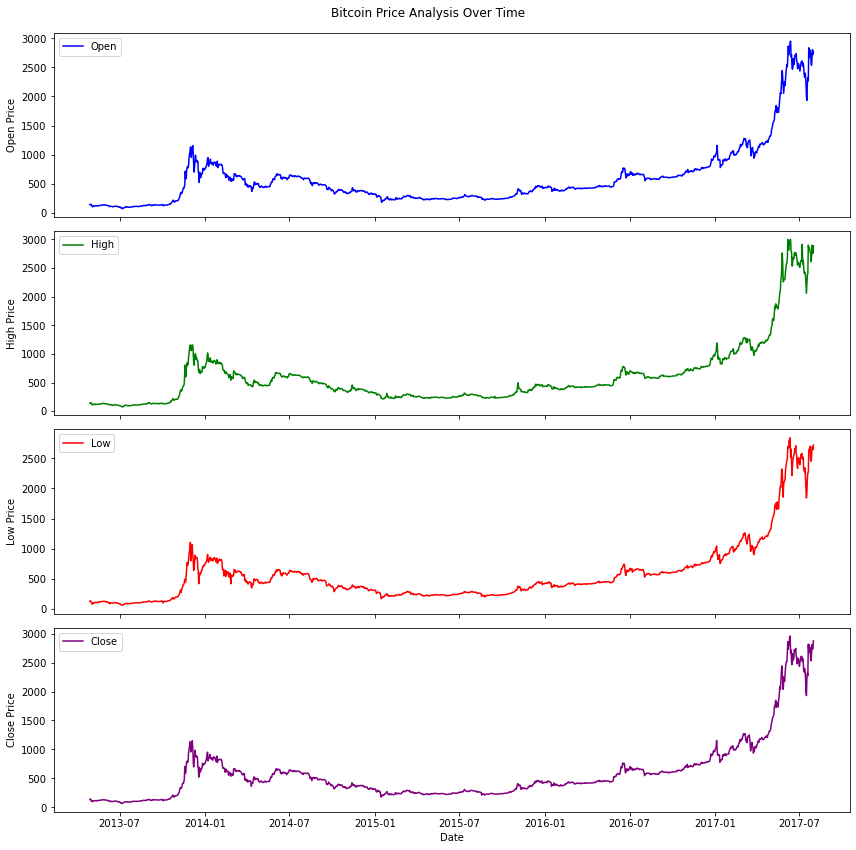

In [10]:
# Create subplots for each price type
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12), sharex=True)

# Plot Open price
axes[0].plot(df['Date'], df['Open'], label='Open', color='blue')
axes[0].set_ylabel('Open Price')
axes[0].legend()

# Plot High price
axes[1].plot(df['Date'], df['High'], label='High', color='green')
axes[1].set_ylabel('High Price')
axes[1].legend()

# Plot Low price
axes[2].plot(df['Date'], df['Low'], label='Low', color='red')
axes[2].set_ylabel('Low Price')
axes[2].legend()

# Plot Close price
axes[3].plot(df['Date'], df['Close'], label='Close', color='purple')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Close Price')
axes[3].legend()

# Set the title for the entire figure
fig.suptitle('Bitcoin Price Analysis Over Time')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)

# Show the plots
plt.show()

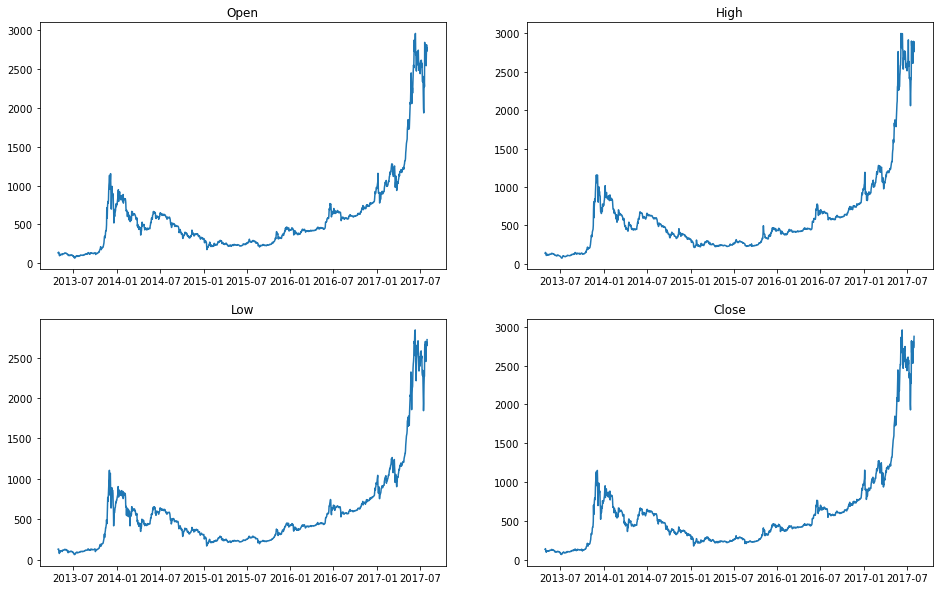

In [11]:
#Shorter code for plotting the same thing
plt.figure(figsize=(16,10))
for index,column in enumerate(['Open','High','Low','Close'],1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'], df[column])
    plt.title(column)

## Analysing Bitcoin Prices using candle stick bar charts!

In [12]:
sample = df[:50]

In [13]:
trace = go.Candlestick(x = sample['Date'],
              open=sample['Open'],
              high=sample['High'],
              low=sample['Low'],
              close = sample['Close'])

In [14]:
candle_data = [trace]

In [15]:
fig = go.Figure(data=candle_data)
fig.update_layout(xaxis_rangeslider_visible = False)

## Analysing Close Price in Depth

In [16]:
df.set_index('Date', inplace=True)

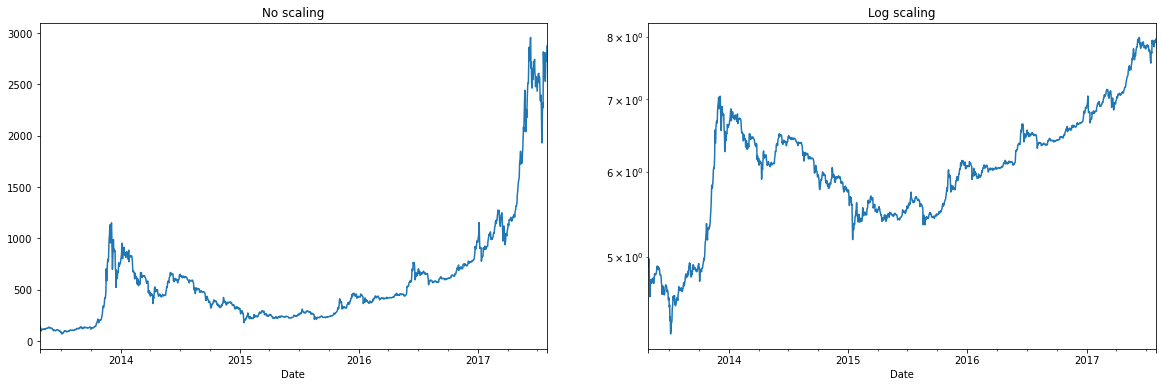

In [17]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
df['Close'].plot()
plt.title('No scaling')


#This logarithmic transformation is useful when you want to visualize data with a wide range of values.
#also to highlight differences in smaller values.

plt.subplot(1,2,2)
np.log1p(df['Close']).plot()
plt.title('Log scaling')
plt.yscale('log')

In [18]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

## Let´s perform Analysis on closing Price on Yearly, Quarterly & monthly basis

In [19]:
#Date has to be our row indexers like for all time series data analysis.
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [20]:
#This is useful when you want to summarize the data in longer time intervals, such as years
#And calculate summary statistics, in this case, the annual average of the closing price.
df['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

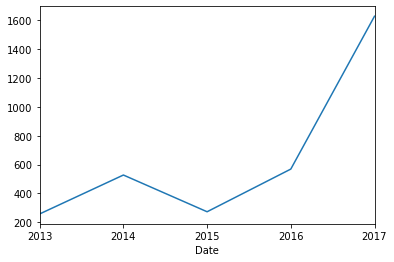

In [21]:
df['Close'].resample('Y').mean().plot()

<AxesSubplot:xlabel='Date'>

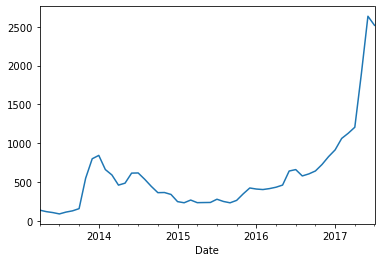

In [22]:
df['Close'].resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

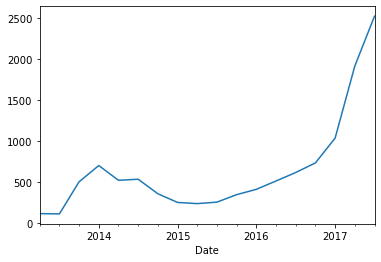

In [23]:
df['Close'].resample('Q').mean().plot()

## ANALYSING DAILY CHANGE IN CLOSING PRICE OF STOCKS

In [24]:
#it studies the current values with the next one. If one is negative is because is minor than the next one
df['Close_price_pct_change'] = df['Close'].pct_change()*100
df['Close_price_pct_change']

Date
2017-07-31          NaN
2017-07-30    -4.109427
2017-07-29    -1.114545
2017-07-28     3.028113
2017-07-27    -4.885351
                ...    
2013-05-02     7.631714
2013-05-01    11.196654
2013-04-30    18.813574
2013-04-29     3.985612
2013-04-28    -7.146811
Name: Close_price_pct_change, Length: 1556, dtype: float64

In [25]:
# Create a line plot with plotly
fig = px.line(df, x=df.index, y='Close_price_pct_change', title='Close Price Percentage Change Over Time')

# Customize the graph if needed
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Percentage Change')

# Show the graph
fig.show()